# Finite difference method


## Finite differences

Another method of solving boundary-value problems (and also partial differential equations, as we'll see later) involves **finite differences**, which are numerical approximations to exact derivatives.

Recall that the exact derivative of a function $f(x)$ at some point $x$ is defined as:
\begin{equation}
f^{\prime}(x) = \frac{df}{dx}(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}
\end{equation}

So, we can *approximate* this derivative using a finite difference (rather than an infinitesimal difference as in the exact derivative):
\begin{equation}
f^{\prime}(x) \approx \frac{f(x+\Delta x) - f(x)}{\Delta x}
\end{equation}
which involves some error. This is a **forward difference** for approximating the first derivative.
We can also approximate the first derivative using a **backward difference**:
\begin{equation}
f^{\prime}(x) \approx \frac{f(x) - f(x - \Delta x)}{\Delta x}
\end{equation}

To understand the error involved in these differences, we can use Taylor's theorem to obtain Taylor series expansions:
\begin{align}
f(x + \Delta x) &= f(x) + \Delta x \, f^{\prime}(x) + \Delta x^2 \frac{1}{2!} f^{\prime\prime}(x) + \cdots \\
\rightarrow \frac{f(x + \Delta x) - f(x)}{\Delta x} &= f^{\prime}(x) + \mathcal{O}\left( \Delta x \right) \\
f(x - \Delta x) &= f(x) - \Delta x \, f^{\prime}(x) + \Delta x^2 \frac{1}{2!} f^{\prime\prime}(x) + \cdots \\
\rightarrow \frac{f(x) - f(x - \Delta x)}{\Delta x} &= f^{\prime}(x) + \mathcal{O}\left( \Delta x \right) \\
\end{align}
where the $\mathcal{O}()$ notation stands for "order of magnitude of". So, we can see that each of these approximations is *first-order accurate*.

## Second-order finite differences

We can obtain higher-order approximations for the first derivative, and an approximations for the second derivative, by combining these Taylor series expansions:
\begin{align}
f(x + \Delta x) &= f(x) + \Delta x \, f^{\prime}(x) + \Delta x^2 \frac{1}{2!} f^{\prime\prime}(x) + \mathcal{O}\left( \Delta x^3 \right) \\
f(x - \Delta x) &= f(x) - \Delta x \, f^{\prime}(x) + \Delta x^2 \frac{1}{2!} f^{\prime\prime}(x) + \mathcal{O}\left( \Delta x^3 \right)
\end{align}

Subtracting the Taylor series for $f(x+\Delta x)$ by that for $f(x-\Delta x)$ gives:
\begin{align}
f(x + \Delta x) - f(x - \Delta x) &= 2 \Delta x \, f^{\prime}(x) + \mathcal{O}\left( \Delta x^3 \right) \\
f^{\prime}(x) &= \frac{f(x + \Delta x) - f(x - \Delta x)}{2 \Delta x} + \mathcal{O}\left( \Delta x^2 \right)
\end{align}
which is a *second-order accurate* approximation for the first derivative.

Adding the Taylor series for $f(x+\Delta x)$ to that for $f(x-\Delta x)$ gives:
\begin{align}
f(x + \Delta x) + f(x - \Delta x) &= 2 f(x) + \Delta x^2 f^{\prime\prime}(x) + \mathcal{O}\left( \Delta x^3 \right) \\
f^{\prime\prime}(x) &= \frac{f(x + \Delta x) - 2 f(x) + f(x - \Delta x)}{\Delta x^2} + \mathcal{O}\left( \Delta x^2 \right)
\end{align}
which is a *second-order accurate* approximation for the second derivative.

## Solving ODEs with finite differences

We can use finite differences to solve ODEs by substituting them for exact derivatives, and then applying the equation at discrete locations in the domain. This gives us a system of simultaneous equations to solve.

For example, let's consider the ODE
\begin{equation}
y^{\prime\prime} + x y^{\prime} - x y = 2 x \;,
\end{equation}
with the boundary conditions $y(0) = 1$ and $y(2) = 8$.

First, we *discretize* the continuous domain: divide it into a number of discrete segments. For now, let's choose $\Delta x = 0.5$, which creates four segments and thus five points: $x_1 = 0, x_2 = 0.5, x_3 = 1.0, x_4 = 1.5, x_5 = 2.0$. 

Our goal is then to find approximate values of $y(x)$ at these points: $y_1$ through $y_5$. So, we have five unknowns, and need five equations to solve for them. We can use the ODE to provide these equations, by replacing the derivatives with finite differences, and applying the equation at particular discrete locations.

Recall that $y(x)$ is a function just like $f(x)$, and so we can apply the above finite difference equations to $y(x)$ and $y(x+\Delta x)$. Now that we have points, or nodes, at locations separated by $\Delta x$, we can consider a point $x_i$ where $y(x_i) = y_i$, $y(x_i + \Delta x) = y(x_{i+1}) = y_{i+1}$, and $y(x_i - \Delta x) = y(x_{i-1}) = y_{i-1}$.

To do this, we'll follow a few steps:

1.) Replace exact derivatives in the original ODE with finite differences, and apply the equation at a particular location $(x_i, y_i)$.

For our example, this gives:
\begin{equation}
\frac{y_{i+1} - 2y_i + y_{i-1}}{\Delta x^2} + x_i \left( \frac{y_{i+1} - y_{i-1}}{2 \Delta x}\right) - x_i y_i = 2 x_i
\end{equation}
which applies at location $(x_i, y_i)$.

2.) Next, rearrange the equation into a *recursion formula*:
\begin{equation}
y_{i-1} \left(1 - x_i \frac{\Delta x}{2}\right) + y_i \left( -2 -\Delta x^2 x_i \right) + y_{i+1} \left(1 + x_i \frac{\Delta x}{2}\right) = 2 x_i \Delta x^2
\end{equation}
We can use this equation to get an equation for each of the interior points in the domain.

For the first and last points—the boundary points—we already have equations, given by the boundary conditions.

3.) Set up system of linear equations

Applying the recursion formula to the interior points, and the boundary conditions for the boundary points, we can get a system of simultaneous linear equations:
\begin{align}
y_1 &= 1 \\
y_1 (0.875) + y_2 (-2.125) + y_3 (1.125) &= 0.25 \\
y_2 (0.75) + y_3 (-2.25) + y_4 (1.25) &= 0.5 \\
y_3 (0.625) + y_4 (-2.375) + y_5 (1.375) &= 0.75 \\
y_5 &= 8
\end{align}

This is a system of five equations and five unknowns, which we can solve! But, solving using substitution would be painful, so let's represent this system of equations using a matrix and vectors:
\begin{equation}
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
0.875 & -2.125 & 1.125 & 0 & 0 \\
0 & 0.75 & -2.25 & 1.25 & 0 \\
0 & 0 & 0.625 & -2.375 & 1.375 \\
0 & 0 & 0 & 0 & 1
\end{bmatrix} 
\begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5 \end{bmatrix} = 
\begin{bmatrix} 1 \\ 0.25 \\ 0.5 \\ 0.75 \\ 8 \end{bmatrix}
\end{equation}
or, more compactly, $A \mathbf{y} = \mathbf{b}$.

4.) Solve the linear system of equations

The final step is just to solve. We can do this in Matlab with `y = A \ b`. (This is equivalent to `y = inv(A)*b`, but faster.)

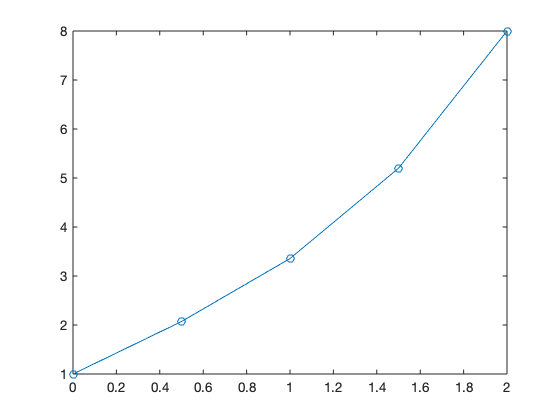

In [16]:
A = [1.0 0 0 0 0;
     0.875 -2.125 1.125 0 0;
         0 0.75 -2.25 1.25 0;
         0 0 0.625 -2.375 1.375;
         0 0 0 0 1];

b = [1.0; 0.25; 0.5; 0.75; 8.0];

x = [0 : 0.5 : 2];
y = A \ b;
plot(x, y, 'o-');

### Matlab implementation

Of course, all of this will be easier if we implement in Matlab in a general way. We'll use a `for` loop to populate the coefficient matrix $A$ and right-hand-side vector $\mathbf{b}$:

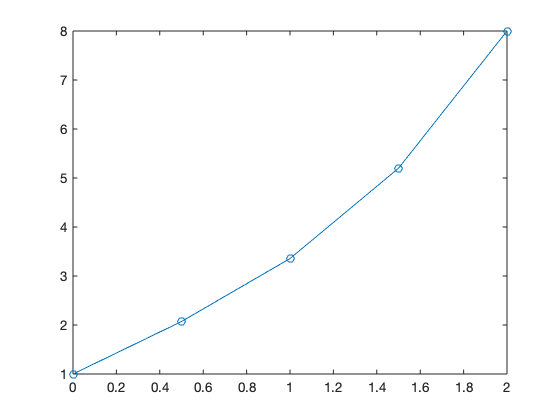

In [14]:
clear all; clc

dx = 0.5;
x = [0 : dx : 2];
n = length(x);
A = zeros(n,n); b = zeros(n,1);

for i = 1 : n
    if i == 1
        A(1,1) = 1;
        b(1) = 1;
    elseif i == n
        A(n,n) = 1;
        b(n) = 8;
    else
        A(i, i-1) = 1 - x(i)*dx/2;
        A(i, i) = -2 - x(i)*dx^2;
        A(i, i+1) = 1 + x(i)*dx/2;
        b(i) = 2*x(i)*dx^2;
    end
end
y = A \ b;
plot(x, y, 'o-')

This looks good, but we can get a more-accurate solution by reducing our step size $\Delta x$:

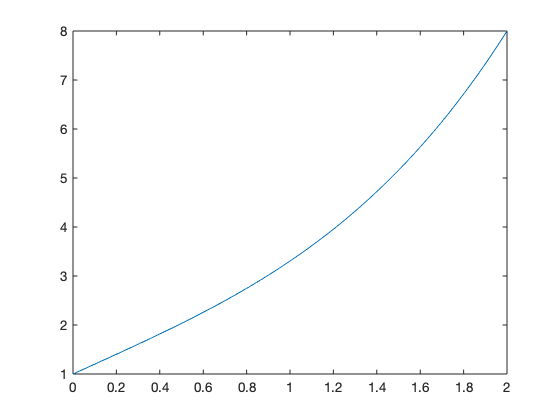

In [5]:
clear all; clc

dx = 0.001;
x = [0 : dx : 2];
n = length(x);
A = zeros(n,n); b = zeros(n,1);

for i = 1 : n
    if i == 1
        A(1,1) = 1;
        b(1) = 1;
    elseif i == n
        A(n,n) = 1;
        b(n) = 8;
    else
        A(i, i-1) = 1 - x(i)*dx/2;
        A(i, i) = -2 - x(i)*dx^2;
        A(i, i+1) = 1 + x(i)*dx/2;
        b(i) = 2*x(i)*dx^2;
    end
end
y = A \ b;
plot(x, y)

## Boundary conditions

We will encounter four main kinds of boundary conditions. Consider the ODE $y^{\prime\prime} + y = 0$, on the domain $0 \leq x \leq L$.

- First type, or Dirichlet, boundary conditions specify fixed values of $y$ at the boundaries: $y(0) = a$ and $y(L) = b$.
- Second type, or Neumann, boundary conditions specify values of the derivative at the boundaries: $y^{\prime}(0) = a$ and $y^{\prime}(L) = b$.
- Third type, or Robin, boundary conditions specify a linear combination of the function value and its derivative at the boundaries: $a \, y(0) + b \, y^{\prime}(0) = g(0)$ and $a \, y(L) + b \, y^{\prime}(L) = g(L)$, where $g(x)$ is some function.
- Mixed boundary conditions, which combine any of these three at the different boundaries. For example, we could have $y(0) = a$ and $y^{\prime}(L) = b$.

Whichever type of boundary condition we are dealing with, the goal will be to construct an equation representing the boundary condition to incorporate in our system of equations.

If we have a fixed value boundary condition, such as $y(0) = a$, then this equation is straightforward:
\begin{equation}
y_1 = a
\end{equation}
where $y_1$ is the first point in the grid of points, corresponding to $x_1 = 0$. (We saw this in the example above.) In Matlab, we can implement this equation with
```OCTAVE
A(1,1) = 1;
b(1) = a;
```

If we have a fixed derivative boundary condition, such as $y^{\prime}(0) = 0$, then we need to use a finite difference to represent the derivative. When the boundary condition is at the starting location, $x=0$, the easiest way to do this is with a **forward difference**:
\begin{align}
y^{\prime}(0) \approx \frac{y_2 - y_1}{\Delta x} &= 0 \\
-y_1 + y_2 &= 0
\end{align}
We can implement this in Matlab with
```OCTAVE
A(1,1) = -1;
A(1,2) = 1;
b(1) = 0;
```

When we have this sort of derivative boundary condition at the right side of the domain, at $x=L$, then we can use a **backward difference** to represent the derivative:
\begin{align}
y^{\prime}(L) \approx \frac{y_n - y_{n_1}}{\Delta x} &= 0 \\
-y_{n-1} + y_n &= 0
\end{align}
where $y_n$ is the final point ($x_n = L$) and $y_{n-1}$ is the second-to-last point ($x_{n-1} = L - \Delta x$). We can implement this in Matlab with
```OCTAVE
A(n,n-1) = -1;
A(n,n) = 1;
b(n) = 0;
```

If we have a linear combination of a fixed value and fixed derivative, like $a \, y(0) + b \, y^{\prime}(0) = c$, then we can combine the above approaches using a forward difference:
\begin{align}
a y(0) + b y^{\prime}(0) \approx a y_1 + b \frac{y_2 - y_1}{\Delta x} &= c \\
(a \Delta x - b) y_1 + b y_2 &= c \Delta x
\end{align}
and in Matlab:
```OCTAVE
A(1,1) = a*dx - b;
A(1,2) = b;
b(1) = c * dx;
```

### Using central differences for derivative BCs

When a boundary condition involves a derivative, we can use a *central difference* to approximate the first derivative; this is more accurate than a forward or backward difference.

Consider the formula for a central difference at $x=0$, applied for the boundary condition $y^{\prime}(0) = 0$:
\begin{align}
y^{\prime}(0) \approx \frac{y_2 - y_0}{2 \Delta x} &= 0 \\
y_0 &= y_2
\end{align}
where $y_0$ is an imaginary, or ghost, node *outside* the domain. We can't actually keep this point in our implementation, because it isn't a real point.

We still need an equation *for* the point at the boundary, $y_1$. To get this, we'll apply the regular recursion formula, normally used at interior points:
\begin{align}
a y_{i-1} + b y_i + c y_{i+1} = f(x_i) \\
a y_0 + b y_1 + c y_2 = f(x_1) \;,
\end{align}
where $a$, $b$, $c$, and $f(x)$ depend on the problem. Normally we wouldn't use this at the boundary node, $y_1$, because it references a point outside the domain to the left—but we have an equation for that! From above, based on the boundary condition, we have $y_0 = y_2$. If we incorporate that into the recursion formula, we can eliminate the ghost node $y_0$:
\begin{align}
a y_2 + b y_1 + c y_2 &= f(x_1) \\
b y_1 + (a + c) y_2 &= f(x_1) \,
\end{align}
which is the equation we can actually use at the boundary point.
In Matlab, this looks like 
```OCTAVE
A(1,1) = b;
A(1,2) = a + c;
b(1) = f(x(1));
```

## Example: heat transfer through a fin

Let's now consider a more complicated example: heat transfer through an extended surface (a fin).

<figure>
  <center>
  <img src="../images/fin.png" alt="Heat transfer fin" style="width: 400px;"/>
  <figcaption>Figure: Geometry of a heat transfer fin</figcaption>
  </center>
</figure>

In this situation, we have the temperature of the body $T_b$, the temperature of the ambient fluid $T_{\infty}$; the length $L$, width $w$, and thickness $t$ of the fin; the thermal conductivity of the fin material $k$; and convection heat transfer coefficient $h$.

Our goal is to solve for the temperature distribution $T(x)$. To do this, we need to set up a governing differential equation. Let's do a control volume analysis of heat transfer through the fin:

<figure>
  <center>
  <img src="../images/fin-control-volume.png" alt="Control volume for heat transfer fin" style="width: 300px;"/>
  <figcaption>Figure: Control volume for heat transfer through the fin</figcaption>
  </center>
</figure>

Given a particular volumetric slice of the fin, we can define the heat transfer rates of conduction through the fin and convection from the fin to the air:
\begin{align}
q_{\text{conv}} &= h P \left( T - T_{\infty} \right) dx \\
q_{\text{cond}, x} &= -k A_c \left(\frac{dT}{dx}\right)_{x} \\
q_{\text{cond}, x+\Delta x} &= -k A_c \left(\frac{dT}{dx}\right)_{x+\Delta x} \;,
\end{align}
where $P$ is the perimeter (so that $P \, dx$ is the heat transfer area to the fluid) and $A_c$ is the cross-sectional area.